# Tutorial 00: First Ubermag notebook

The goal of this tutorial is to familiarise users with basics of running Ubermag simulations and Jupyter notebook.

The only thing you need to know for this tutorial is how to execute individual cells: this is done by pressing `Shift` + `Return` (`Return` = `Enter`).

## Simple Ubermag simulation

Before we specify and run the simulation, we have to import Ubermag modules we intend to use. For defining micromagnetic models, we need to import `micromagneticmodel` and for defining finite-diference fields, we are going to import `discretisedfield`.

In [1]:
import micromagneticmodel as mm
import discretisedfield as df

# The following line enables plotting inside the notebook.
%matplotlib inline

### The main object in Ubermag: System object

The main object in Ubermag is `micromagneticmodel.System`. In order to define the micromagnetic system we want to simulate, we have to specify:

1. Energy equation,
2. Dynamics equation,
3. Initial magentisation state configuration.

In [2]:
system = mm.System(name='first_ubermag_simulation')

#### 1. Energy equation

The energy equation for the first Ubermag simulaton is very simple and contains only the following energy terms:

1. Exchange $A=1\,\text{pJ}/\text{m}$,
2. Zeeman $H=(5 \times 10^{6}, 0, 0) \,\text{A/m}$,
3. Demagnetisation.

In [3]:
A = 1e-12  # exchange energy constant (J/m)
H = (5e6, 0, 0)  # external magnetic field in the x-direction (A/m)
system.energy = mm.Exchange(A=A) + mm.Demag() + mm.Zeeman(H=H)

We can now inspect our energy equation:

In [4]:
system.energy

Exchange(A=1e-12) + Demag() + Zeeman(H=(5000000.0, 0, 0))

#### 2. Dynamics equation

The dynamics equation contains only precession and damping terms:

In [5]:
gamma0 = 2.211e5  # gyrotropic ratio parameter (m/As)
alpha = 0.2  # Gilbert damping
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)

We can now inspect our dynamics equation:

In [6]:
system.dynamics

Precession(gamma0=221100.0) + Damping(alpha=0.2)

#### 3. Initial magnetisation

We choose to simulate a cube with $50 \,\,\text{nm}$ edge length and discretise it into $10$ cells in each direction ($1000$ in total). We initialise the system in positive $y$-direction, i.e. $\mathbf{m} = (0, 1, 0)$, which is different from the equlibrium state we expect for the external magnetic field applied in $x$-direction. For its norm (saturation magnetisation), we choose $M_\text{s} = 8\times 10^{6} \,\text{A}/\text{m}$.

In [7]:
L = 50e-9  # cubic sample edge length (m)
d = 5e-9  # discretisation cell size (m)
region = df.Region(p1=(0, 0, 0), p2=(L, L, L))
mesh = df.Mesh(region=region, cell=(d, d, d))

Ms = 8e6  # saturation magnetisation (A/m)
system.m = df.Field(mesh, dim=3, value=(0, 1, 0), norm=Ms)

We can now inspect different properties of our magnetisation field:

In [8]:
region.k3d()

Output()

In [9]:
mesh.k3d()

Output()

In [10]:
system.m.plane('z').k3d_vectors(head_size=20)

Output()

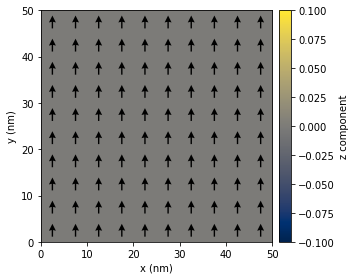

In [11]:
system.m.plane('z').mpl()

### Driving the system

After the system object is created, we can minimise its energy (relax it) using the Minimisation Driver (`MinDriver`). At this point, we choose the calculator (simulator) we want to use. During this workshop, we are going to use OOMMF. Therefore, we import OOMMF calculator - `oommfc`.

In [12]:
import oommfc as oc

md = oc.MinDriver()
md.drive(system)

Running OOMMF (ExeOOMMFRunner) [2020/04/24 12:59]... (2.3 s)


The system is now relaxed, and we can plot its slice and compute its average magnetisation.

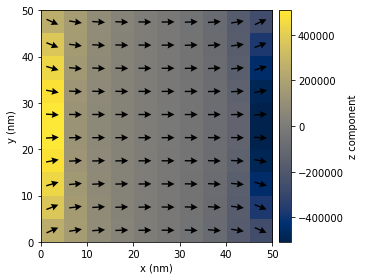

In [13]:
system.m.plane('z', n=(10, 10)).mpl()

In [14]:
system.m.plane('z').k3d_vectors(color_field=system.m.z, head_size=20)

Output()

In [15]:
system.m.average

(7860158.23594486, -0.007358911219518632, -4.656612873077393e-12)

We can see that the magnetisation is aligned along the $x$-direction, as expected having in mind we applied the external magnetic field in that direction.